Step1: Compare Hum1(SEB) and Hum2(SEB) performances 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data and fix missing values
file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

hum_sheets = ['Hum1', 'Hum2']
dfs_hum = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in hum_sheets}

numeric_cols = ['accuracy_score','efficiency_score','politeness_score',
                'trust_score','satisfaction_score','risk_flag','token_count']

for name, df in dfs_hum.items():
    print(f"Missing values in {name} before filling:")
    print(df[numeric_cols].isna().sum())
    print("\n")

dfs_hum['Hum1'][numeric_cols] = dfs_hum['Hum1'][numeric_cols].fillna(dfs_hum['Hum1'][numeric_cols].mean())

for name, df in dfs_hum.items():
    print(f"Missing values in {name} after filling (Hum2 should be intact):")
    print(df[numeric_cols].isna().sum())
    print("\n")

Missing values in Hum1 before filling:
accuracy_score        11
efficiency_score      11
politeness_score      11
trust_score           11
satisfaction_score    11
risk_flag             11
token_count           11
dtype: int64


Missing values in Hum2 before filling:
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag             0
token_count           0
dtype: int64


Missing values in Hum1 after filling (Hum2 should be intact):
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag             0
token_count           0
dtype: int64


Missing values in Hum2 after filling (Hum2 should be intact):
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag             0
token_count           0
dtype: int64




In [ ]:
# descriptive statistics for Hum1 and Hum2
hum1_df = dfs_hum['Hum1']
hum2_df = dfs_hum['Hum2']

hum1_stats = hum1_df[numeric_cols].agg(['mean','std','min','max'])
hum2_stats = hum2_df[numeric_cols].agg(['mean','std','min','max'])

print("Hum1 descriptive statistics:")
print(hum1_stats)
print("\nHum2 descriptive statistics:")
print(hum2_stats)

Hum1 descriptive statistics:
      accuracy_score  efficiency_score  politeness_score  trust_score  \
mean        0.812500               5.0          2.000000     1.937500   
std         0.413126               0.0          0.733799     0.705405   
min         0.000000               5.0          1.000000     1.000000   
max         2.000000               5.0          4.000000     4.000000   

      satisfaction_score  risk_flag  token_count  
mean            2.375000   0.750000    23.400000  
std             0.995181   0.339683    13.232914  
min             1.000000   0.000000     1.300000  
max             5.000000   1.000000    62.400000  

Hum2 descriptive statistics:
      accuracy_score  efficiency_score  politeness_score  trust_score  \
mean        1.666667           3.37037          4.185185     4.518519   
std         0.554700           0.92604          0.483341     0.509175   
min         0.000000           1.00000          3.000000     4.000000   
max         2.000000        

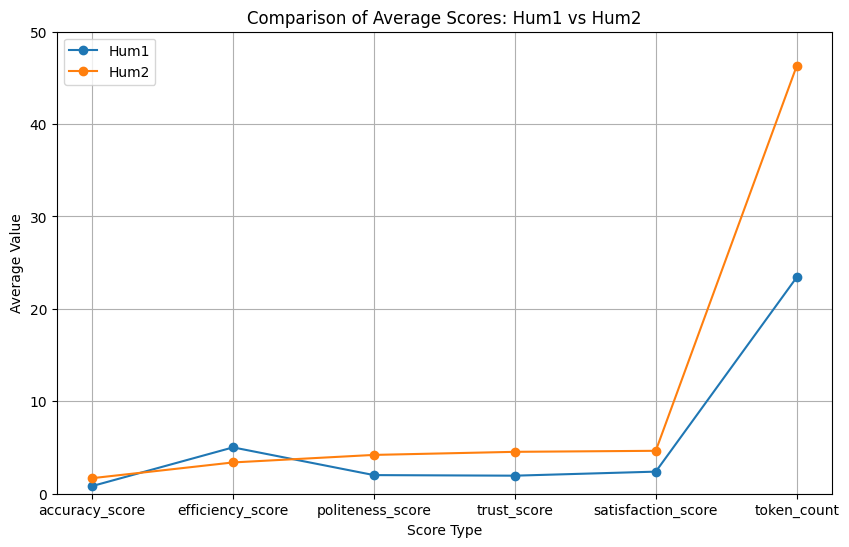

In [17]:
# Line plot comparison for Hum1 vs Hum2 scores
score_cols = ['accuracy_score','efficiency_score','politeness_score','trust_score','satisfaction_score', 'token_count']

hum1_means = hum1_df[score_cols].mean()
hum2_means = hum2_df[score_cols].mean()

plt.figure(figsize=(10,6))
plt.plot(score_cols, hum1_means, marker='o', label='Hum1')
plt.plot(score_cols, hum2_means, marker='o', label='Hum2')
plt.title('Comparison of Average Scores: Hum1 vs Hum2')
plt.xlabel('Score Type')
plt.ylabel('Average Value')
plt.ylim(0,50)
plt.grid(True)
plt.legend()
plt.show()

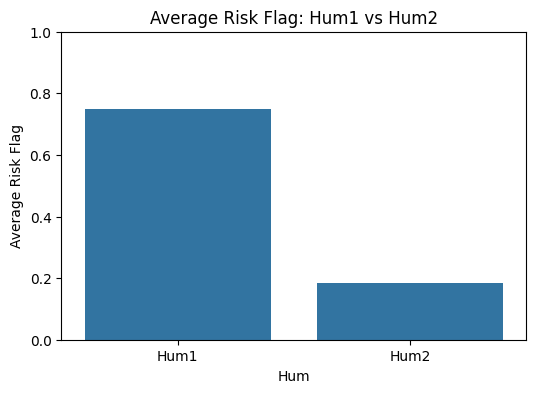

In [ ]:
#barplot for average risk_flag
risk_avg = pd.DataFrame({
    'Hum': ['Hum1','Hum2'],
    'Average Risk': [hum1_df['risk_flag'].mean(), hum2_df['risk_flag'].mean()]
})

plt.figure(figsize=(6,4))
sns.barplot(x='Hum', y='Average Risk', data=risk_avg)
plt.title('Average Risk Flag: Hum1 vs Hum2')
plt.ylabel('Average Risk Flag')
plt.ylim(0,1)
plt.show()

Step2: compare deepseek(web) 0(lengthy) & deepseek(web) 1(simplified)
               gpt-oss120b 0(lengthy) & gpt-oss120b 1(simplied)
               llama3:8b 0(lengthy) & llama3:8b 1(simplified)

In [ ]:
# Descriptive statistics for LLMs: Deep0, Deep1, Gpt0, Gpt1, Llama0, Llama1
LLM_sheets = ['Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in LLM_sheets}

numeric_cols1 = ['accuracy_score','efficiency_score','politeness_score',
                'trust_score','satisfaction_score','risk_flag','token_count']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

for name, df in dfs.items():
    print(f"--- {name} Descriptive Statistics ---")
    stats = df[numeric_cols1].describe().transpose() 
    print(stats.to_string())
    print("\n")

--- Deep0 Descriptive Statistics ---
                    count        mean        std   min    25%    50%    75%    max
accuracy_score       27.0    2.000000   0.000000   2.0   2.00    2.0    2.0    2.0
efficiency_score     27.0    4.962963   0.192450   4.0   5.00    5.0    5.0    5.0
politeness_score     27.0    4.370370   0.492103   4.0   4.00    4.0    5.0    5.0
trust_score          27.0    4.962963   0.192450   4.0   5.00    5.0    5.0    5.0
satisfaction_score   27.0    4.666667   0.480384   4.0   4.00    5.0    5.0    5.0
risk_flag            27.0    0.000000   0.000000   0.0   0.00    0.0    0.0    0.0
token_count          27.0  110.259259  31.283299  40.3  87.75  117.0  127.4  184.6


--- Deep1 Descriptive Statistics ---
                    count       mean       std  min    25%   50%   75%   max
accuracy_score       27.0   1.962963  0.192450  1.0   2.00   2.0   2.0   2.0
efficiency_score     27.0   4.962963  0.192450  4.0   5.00   5.0   5.0   5.0
politeness_score     27.0   4

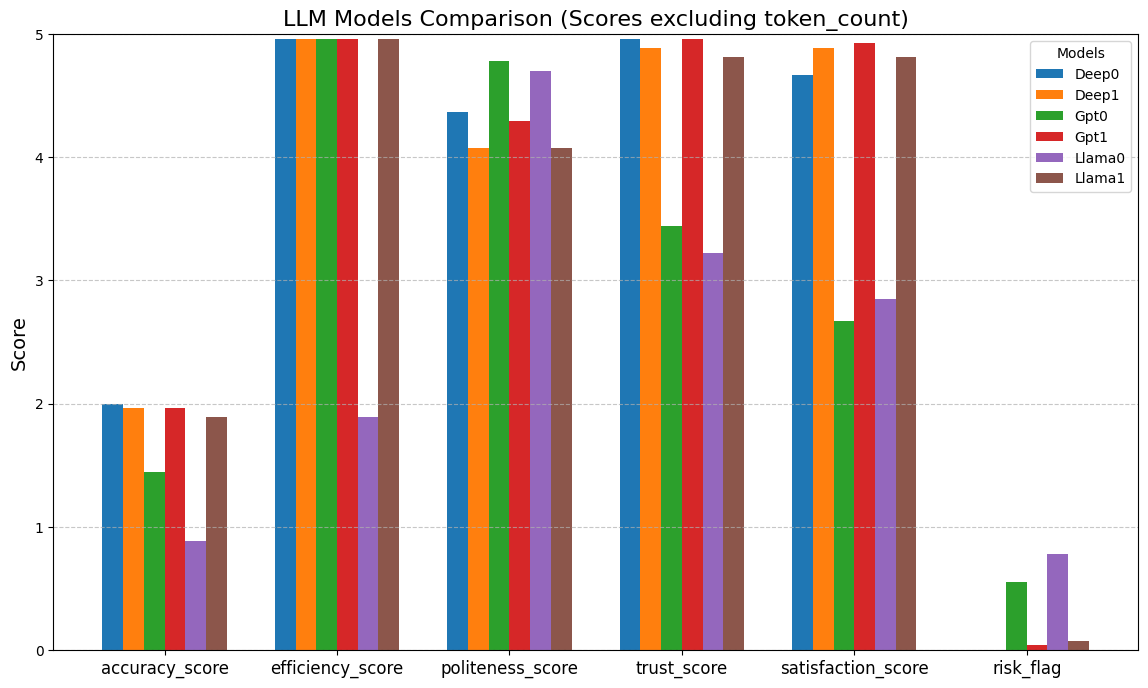

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

means_dict = {}
for name, df in dfs.items():
    temp = df[numeric_cols1].mean()
    means_dict[name] = temp  
means_df = pd.DataFrame(means_dict).T 
means_df = means_df.drop(columns=['token_count']) 

scores = means_df.columns
models = means_df.index
x = np.arange(len(scores)) 
width = 0.12  

plt.figure(figsize=(14, 8))
for i, model in enumerate(models):
    plt.bar(x + i*width, means_df.loc[model], width=width, label=model)

plt.xticks(x + width*(len(models)/2 - 0.5), scores, fontsize=12)
plt.ylim(0, 5)
plt.ylabel("Score", fontsize=14)
plt.title("LLM Models Comparison (Scores excluding token_count)", fontsize=16)
plt.legend(title="Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

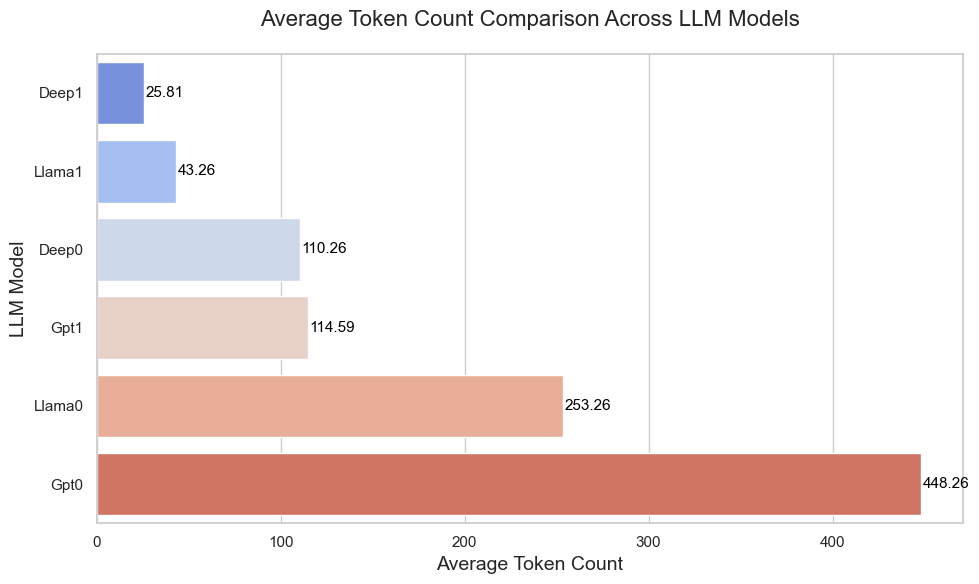

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

token_means = {name: df['token_count'].mean() for name, df in dfs.items()}
token_df = pd.DataFrame(list(token_means.items()), columns=['Model', 'Average_Token_Count'])
token_df = token_df.sort_values(by='Average_Token_Count', ascending=True)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=token_df,
    x='Average_Token_Count',
    y='Model',
    hue='Model',         
    palette='coolwarm',
    legend=False         
)

for index, value in enumerate(token_df['Average_Token_Count']):
    plt.text(value + 1, index, f"{value:.2f}", va='center', fontsize=11, color='black')

plt.title("Average Token Count Comparison Across LLM Models", fontsize=16, pad=20)
plt.xlabel("Average Token Count", fontsize=14)
plt.ylabel("LLM Model", fontsize=14)

plt.tight_layout()
plt.show()

Step3: Compare Hum1&2 and LLMs Accuracy

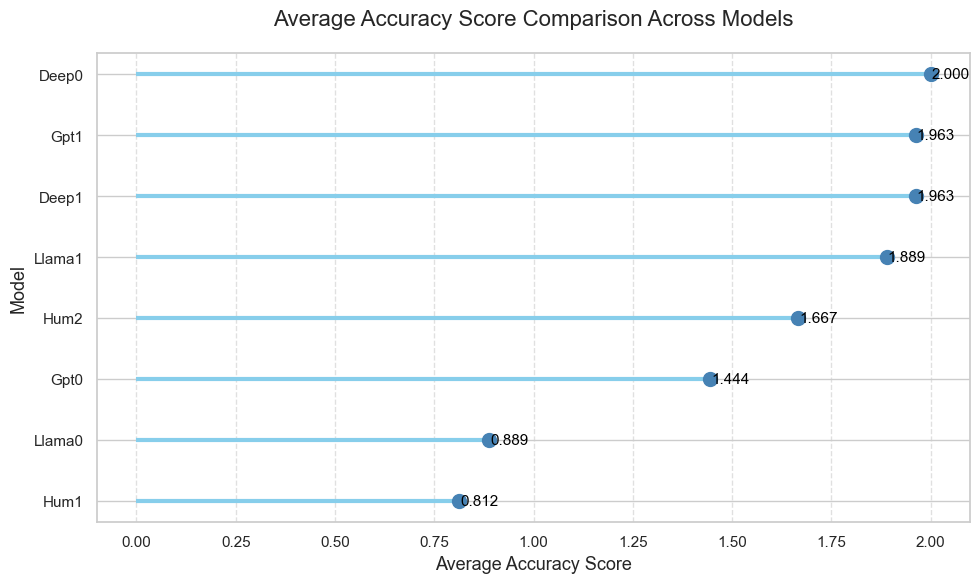

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

sheets = ['Hum1', 'Hum2', 'Deep0', 'Deep1', 'Gpt0', 'Gpt1', 'Llama0', 'Llama1']

dfs1 = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets}

hum1_df = dfs1['Hum1']
hum1_df['accuracy_score'] = hum1_df['accuracy_score'].fillna(hum1_df['accuracy_score'].mean())
dfs1['Hum1'] = hum1_df

mean_accuracy = {name: df['accuracy_score'].mean() for name, df in dfs1.items()}

acc_df = pd.DataFrame(list(mean_accuracy.items()), columns=['Model', 'Average_Accuracy'])
acc_df = acc_df.sort_values(by='Average_Accuracy', ascending=True)

# Lollipop plot
plt.figure(figsize=(10, 6))
plt.hlines(y=acc_df['Model'], xmin=0, xmax=acc_df['Average_Accuracy'], color='skyblue', linewidth=3)
plt.plot(acc_df['Average_Accuracy'], acc_df['Model'], "o", markersize=10, color='steelblue')

for index, value in enumerate(acc_df['Average_Accuracy']):
    plt.text(value + 0.002, index, f"{value:.3f}", va='center', fontsize=11, color='black')

plt.title("Average Accuracy Score Comparison Across Models", fontsize=16, pad=20)
plt.xlabel("Average Accuracy Score", fontsize=13)
plt.ylabel("Model", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

Step3: compare Hum1&Hum2 and LLMs Efficiency & Token

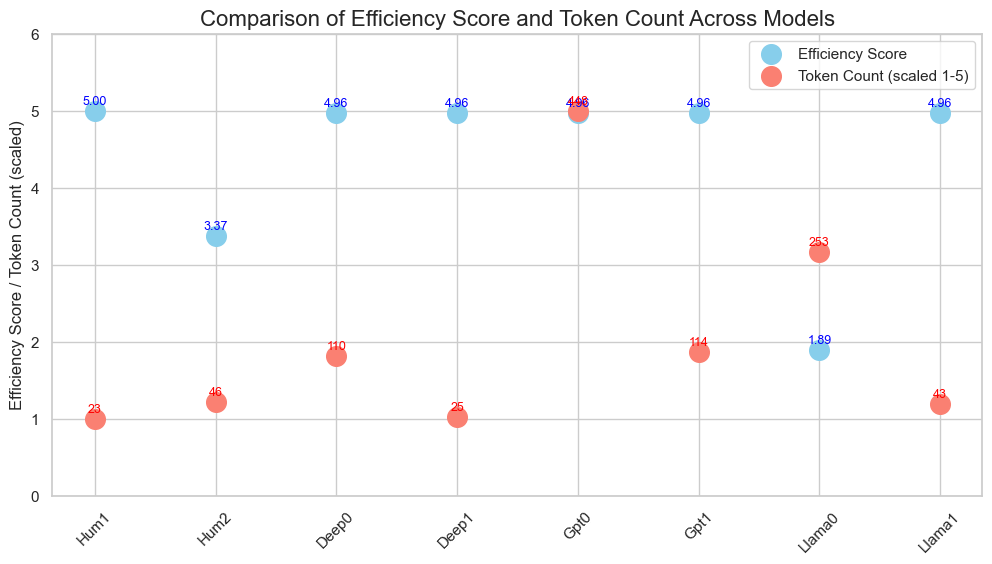

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

sheets2= ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs2 = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets2}

numeric_cols2 = ['efficiency_score','token_count']

dfs2['Hum1'][numeric_cols2] = dfs2['Hum1'][numeric_cols2].fillna(dfs2['Hum1'][numeric_cols2].mean())

means = {}
for name, df in dfs2.items():
    means[name] = df[numeric_cols2].mean()

means_df = pd.DataFrame(means).T.reset_index()
means_df = means_df.rename(columns={'index':'Model'})

token_min = means_df['token_count'].min()
token_max = means_df['token_count'].max()
means_df['token_count_scaled'] = 1 + 4*(means_df['token_count'] - token_min)/(token_max - token_min)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

plt.scatter(means_df['Model'], means_df['efficiency_score'], s=200, color='skyblue', label='Efficiency Score')
plt.scatter(means_df['Model'], means_df['token_count_scaled'], s=200, color='salmon', label='Token Count (scaled 1-5)')

for i, row in means_df.iterrows():
    plt.text(row['Model'], row['efficiency_score']+0.05, f"{row['efficiency_score']:.2f}", 
             ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(row['Model'], row['token_count_scaled']+0.05, f"{int(row['token_count'])}", 
             ha='center', va='bottom', fontsize=9, color='red')

plt.ylim(0,6)
plt.ylabel("Efficiency Score / Token Count (scaled)")
plt.title("Comparison of Efficiency Score and Token Count Across Models", fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.show()

Step4:Compare Politeness of 2 human agents and 6 LLMs

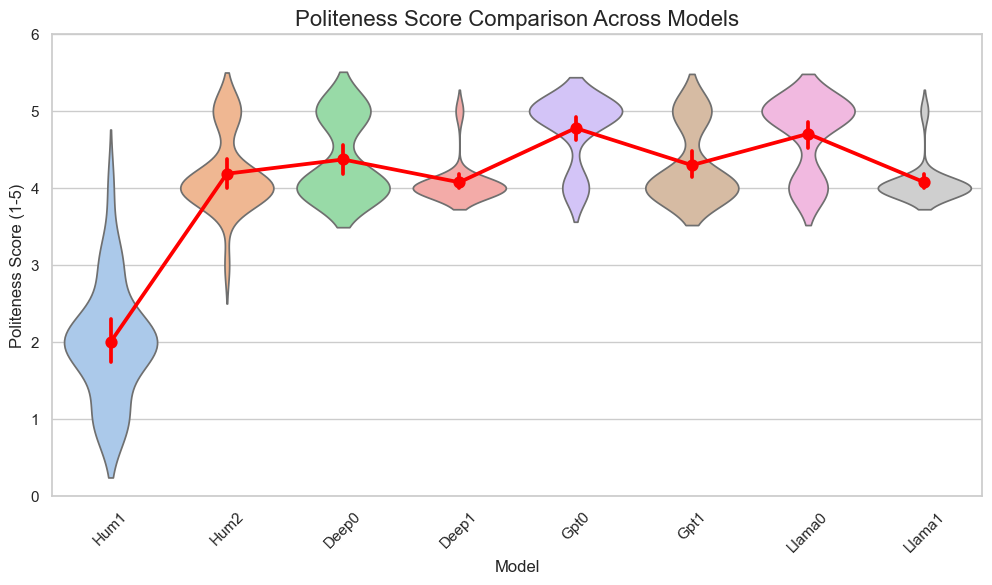

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

sheets3 = ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs3 = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets3}

dfs3['Hum1']['politeness_score'] = dfs3['Hum1']['politeness_score'].fillna(dfs3['Hum1']['politeness_score'].mean())

politeness_data = []
for name, df in dfs3.items():
    temp = df[['politeness_score']].copy()
    temp['Model'] = name
    politeness_data.append(temp)

politeness_df = pd.concat(politeness_data, ignore_index=True)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

# Violin plot 
sns.violinplot(x='Model', y='politeness_score', data=politeness_df, inner=None, palette='pastel', hue='Model', legend=False)
sns.pointplot(x='Model', y='politeness_score', data=politeness_df, estimator=np.mean, color='red', markers='o')

plt.title("Politeness Score Comparison Across Models", fontsize=16)
plt.ylabel("Politeness Score (1-5)")
plt.ylim(0,6)
plt.xticks(rotation=45)
plt.show()


Step5: Research on how trust_score is affected by politeness_score, and accuracy_score in Hum1
                       satisfaction_score is affected by accuracy_score, politeness_score, efficiency_score in Hum1

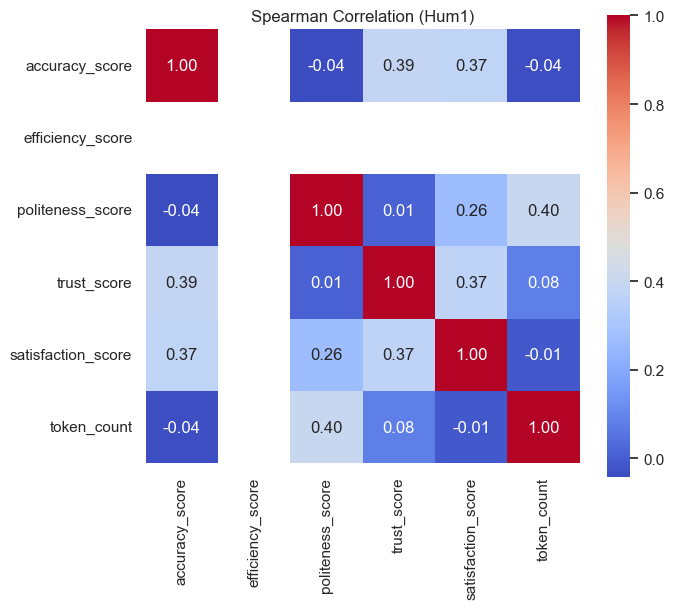

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df4 = pd.read_excel(file_path, sheet_name='Hum1')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score',
        'trust_score', 'satisfaction_score', 'token_count']

df_num = df4[cols].copy()
df_num = df_num.fillna(df_num.mean(numeric_only=True))
corr_spearman = df_num.corr(method='spearman')

plt.figure(figsize=(7,6))
sns.set(style="white")
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Spearman Correlation (Hum1)")
plt.show()

In [16]:

X_vif = df_num.drop(columns=['trust_score']).copy()
X_vif = X_vif.assign(const=1)  

try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    statsmodels_available = True
except ImportError:
    statsmodels_available = False

if statsmodels_available:
    vif_data = pd.DataFrame()
    vif_data['feature'] = X_vif.columns
    vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    print("VIF (including const):\n", vif_data)
else:
    print("statsmodels not available -> cannot compute VIF. Install statsmodels with 'pip install statsmodels'")

VIF (including const):
               feature       VIF
0      accuracy_score  1.618845
1    efficiency_score  0.000000
2    politeness_score  1.561307
3  satisfaction_score  1.985878
4         token_count  1.467222
5               const  0.000000


c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [17]:
#linear regression
# baseline cross-validated R^2 (no scaling)
X = df_num[['accuracy_score','politeness_score','satisfaction_score','token_count']].copy()
y = df_num['trust_score'].copy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()
cv_r2 = cross_val_score(lr, X, y, cv=kf, scoring='r2')
print("LinearRegression CV R2 (no scaling):", cv_r2, "mean:", np.mean(cv_r2))

LinearRegression CV R2 (no scaling): [ 0.30250584  0.52881719 -0.78144255  0.         -1.63832366] mean: -0.31768863618945564


In [ ]:
# Ridge regression for different alpha values, evaluate with CV
alphas = [0.01, 0.1, 1, 10, 100]
for a in alphas:
    model = make_pipeline(StandardScaler(), Ridge(alpha=a, random_state=42))
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"Ridge alpha={a} CV R2:", scores, "mean:", np.mean(scores))


Ridge alpha=0.01 CV R2: [ 0.30285674  0.52823605 -0.77989966  1.         -1.6383884 ] mean: -0.11743905488757474
Ridge alpha=0.1 CV R2: [ 0.30590199  0.52308012 -0.76631738  1.         -1.63884963] mean: -0.11523698137888072
Ridge alpha=1 CV R2: [ 0.32738197  0.47823547 -0.65464414  1.         -1.63248063] mean: -0.09630146644251196
Ridge alpha=10 CV R2: [ 0.31113048  0.29541143 -0.28379746  1.         -1.18293504] mean: 0.027961881261048437
Ridge alpha=100 CV R2: [ 0.05709143  0.04702705 -0.43282926  1.         -0.06868587] mean: 0.12052067088945126



Final model fitted on full data (StandardScaler + LinearRegression):
R2 on training (full data): 0.6251139015520502
RMSE on training (full data): 0.42383124256356564
  accuracy_score: -0.2103
  politeness_score: -0.0374
  satisfaction_score: 0.6686
  token_count: 0.1569
Intercept (on scaled features): 1.9375


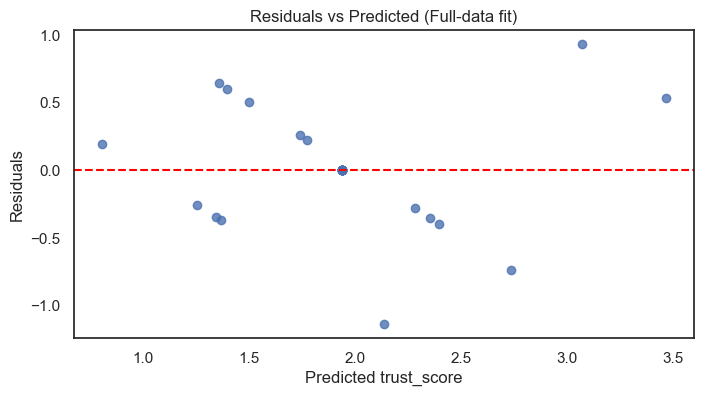

In [ ]:
# fit final pipeline on full data, show coefficients, R2, RMSE, and residual plot
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X, y)
y_pred = pipe.predict(X)

print("\nFinal model fitted on full data (StandardScaler + LinearRegression):")
print("R2 on training (full data):", r2_score(y, y_pred))
print("RMSE on training (full data):", np.sqrt(mean_squared_error(y, y_pred)))

coefs = pipe.named_steps['linearregression'].coef_
intercept = pipe.named_steps['linearregression'].intercept_
for feat, c in zip(X.columns, coefs):
    print(f"  {feat}: {c:.4f}")
print("Intercept (on scaled features):", intercept)

residuals = y - y_pred
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals, alpha=0.8)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted trust_score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Full-data fit)")
plt.show()


In [ ]:
# ordered logistic regression
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df6 = pd.read_excel(file_path, sheet_name='Hum1')

cols = ['trust_score', 'accuracy_score', 'politeness_score']
df6 = df6[cols].copy()
df6 = df6.fillna(df6.mean(numeric_only=True))

X = df6[['accuracy_score', 'politeness_score']]
y = df6['trust_score']

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.191094
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
                             OrderedModel Results                             
Dep. Variable:            trust_score   Log-Likelihood:                -32.160
Model:                   OrderedModel   AIC:                             74.32
Method:            Maximum Likelihood   BIC:                             80.80
Date:                Sat, 01 Nov 2025                                         
Time:                        17:00:36                                         
No. Observations:                  27                                         
Df Residuals:                      22                                         
Df Model:                           2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

In [ ]:
import pandas as pd
import pingouin as pg

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df = pd.read_excel(file_path, sheet_name='Hum1')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score']
df_num = df[cols].copy()

df_num = df_num.fillna(df_num.mean(numeric_only=True))

pcorr_accuracy = pg.partial_corr(data=df_num, x='satisfaction_score', y='accuracy_score',
                                 covar=['politeness_score','efficiency_score'], method='pearson')
print("Partial correlation (satisfaction_score vs accuracy_score):\n", pcorr_accuracy, "\n")

pcorr_politeness = pg.partial_corr(data=df_num, x='satisfaction_score', y='politeness_score',
                                   covar=['accuracy_score','efficiency_score'], method='pearson')
print("Partial correlation (satisfaction_score vs politeness_score):\n", pcorr_politeness, "\n")

pcorr_efficiency = pg.partial_corr(data=df_num, x='satisfaction_score', y='efficiency_score',
                                   covar=['accuracy_score','politeness_score'], method='pearson')
print("Partial correlation (satisfaction_score vs efficiency_score):\n", pcorr_efficiency)

Partial correlation (satisfaction_score vs accuracy_score):
           n         r        CI95%     p-val
pearson  27  0.593957  [0.26, 0.8]  0.001746 

Partial correlation (satisfaction_score vs politeness_score):
           n         r          CI95%     p-val
pearson  27  0.321319  [-0.08, 0.64]  0.117301 

Partial correlation (satisfaction_score vs efficiency_score):
           n         r           CI95%     p-val
pearson  27 -0.675951  [-0.85, -0.38]  0.000208


c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix


c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix


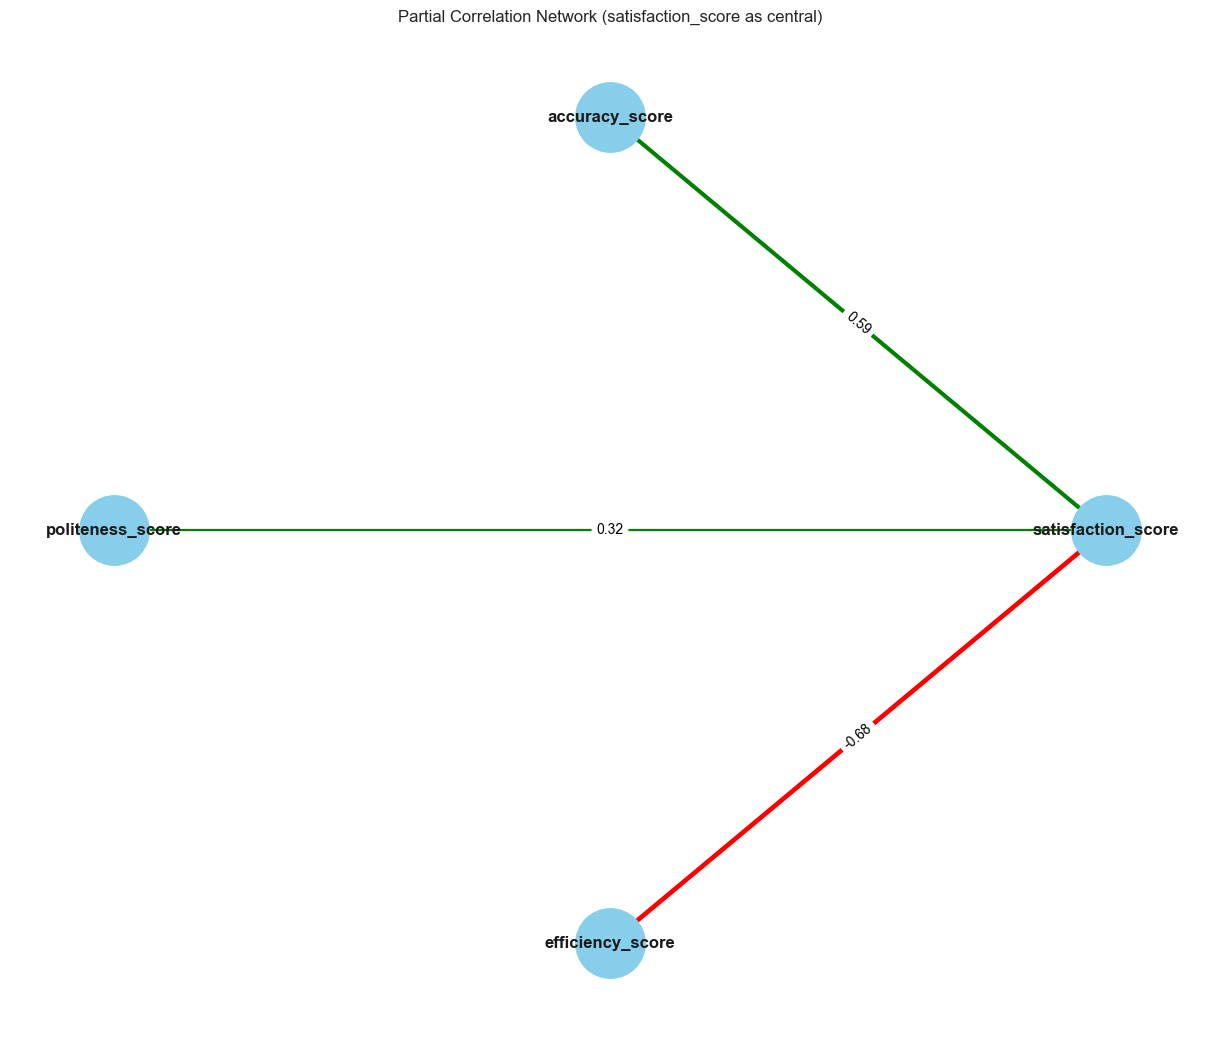

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pingouin as pg

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df = pd.read_excel(file_path, sheet_name='Hum1')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score']
df_num = df[cols].copy()
df_num = df_num.fillna(df_num.mean(numeric_only=True))

pcorr_accuracy = pg.partial_corr(data=df_num, x='satisfaction_score', y='accuracy_score',
                                 covar=['politeness_score','efficiency_score'], method='pearson')
pcorr_politeness = pg.partial_corr(data=df_num, x='satisfaction_score', y='politeness_score',
                                   covar=['accuracy_score','efficiency_score'], method='pearson')
pcorr_efficiency = pg.partial_corr(data=df_num, x='satisfaction_score', y='efficiency_score',
                                   covar=['accuracy_score','politeness_score'], method='pearson')

edges = [
    ('satisfaction_score', 'accuracy_score', pcorr_accuracy['r'].values[0]),
    ('satisfaction_score', 'politeness_score', pcorr_politeness['r'].values[0]),
    ('satisfaction_score', 'efficiency_score', pcorr_efficiency['r'].values[0])
]

G = nx.Graph()
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

pos = nx.circular_layout(G)
weights = [abs(G[u][v]['weight'])*5 for u,v in G.edges()]  
colors = ['green' if G[u][v]['weight']>0 else 'red' for u,v in G.edges()]  # positive=green, negative=red

plt.figure(figsize=(12,10))
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='skyblue', 
        width=weights, edge_color=colors, font_size=12, font_weight='bold')

edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.title("Partial Correlation Network (satisfaction_score as central)", fontsize=12)
plt.show()

Step6: Research on how trust_score is affected by politeness_score, and accuracy_score in Hum2
                       satisfaction_score is affected by accuracy_score, politeness_score, efficiency_score in Hum2

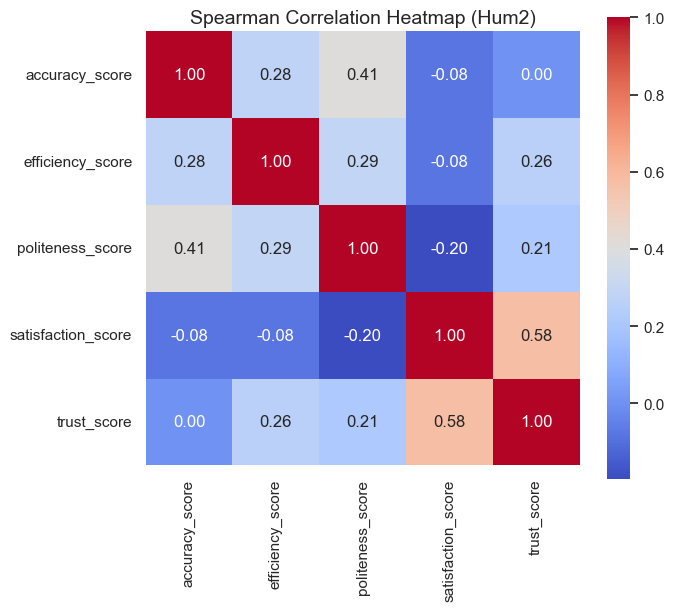

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df = pd.read_excel(file_path, sheet_name='Hum2')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score', 'trust_score']
df_num = df[cols].copy()

df_num = df_num.fillna(df_num.mean(numeric_only=True))

# Compute Spearman correlation matrix
corr_matrix = df_num.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Spearman Correlation Heatmap (Hum2)", fontsize=14)
plt.show()


In [ ]:
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df = pd.read_excel(file_path, sheet_name='Hum2')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score', 'trust_score']
df_num = df[cols].copy()

df_num = df_num.fillna(df_num.mean(numeric_only=True))

X = df_num[['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score']]
y = df_num['trust_score']

model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

print(result.summary())

pred_probs = result.predict()
print(pred_probs[:5])

Optimization terminated successfully.
         Current function value: 0.344870
         Iterations: 50
         Function evaluations: 53
         Gradient evaluations: 53
                             OrderedModel Results                             
Dep. Variable:            trust_score   Log-Likelihood:                -9.3115
Model:                   OrderedModel   AIC:                             28.62
Method:            Maximum Likelihood   BIC:                             35.10
Date:                Sat, 01 Nov 2025                                         
Time:                        17:53:19                                         
No. Observations:                  27                                         
Df Residuals:                      22                                         
Df Model:                           4                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

In [40]:
import pingouin as pg
import pandas as pd
xls = pd.ExcelFile('C:\\Users\\grace\\VisualStudioProject\\Thesis\\data.xlsm')
Hum2 = pd.read_excel(xls, sheet_name='Hum2')

pcorr_accuracy = pg.partial_corr(data=Hum2,
                                  x='trust_score',
                                  y='accuracy_score',
                                  covar=['efficiency_score', 'politeness_score', 'satisfaction_score'],
                                  method='pearson')
print("Partial correlation (trust_score vs accuracy_score):\n", pcorr_accuracy)

pcorr_efficiency = pg.partial_corr(data=Hum2,
                                   x='trust_score',
                                   y='efficiency_score',
                                   covar=['accuracy_score', 'politeness_score', 'satisfaction_score'],
                                   method='pearson')
print("\nPartial correlation (trust_score vs efficiency_score):\n", pcorr_efficiency)

pcorr_politeness = pg.partial_corr(data=Hum2,
                                   x='trust_score',
                                   y='politeness_score',
                                   covar=['accuracy_score', 'efficiency_score', 'satisfaction_score'],
                                   method='pearson')
print("\nPartial correlation (trust_score vs politeness_score):\n", pcorr_politeness)

pcorr_satisfaction = pg.partial_corr(data=Hum2,
                                     x='trust_score',
                                     y='satisfaction_score',
                                     covar=['accuracy_score', 'efficiency_score', 'politeness_score'],
                                     method='pearson')
print("\nPartial correlation (trust_score vs satisfaction_score):\n", pcorr_satisfaction)


Partial correlation (trust_score vs accuracy_score):
           n         r          CI95%     p-val
pearson  27 -0.274749  [-0.61, 0.14]  0.193838

Partial correlation (trust_score vs efficiency_score):
           n         r          CI95%     p-val
pearson  27  0.249248  [-0.17, 0.59]  0.240183

Partial correlation (trust_score vs politeness_score):
           n         r       CI95%     p-val
pearson  27  0.405752  [0.0, 0.7]  0.049158

Partial correlation (trust_score vs satisfaction_score):
           n         r         CI95%    p-val
pearson  27  0.647222  [0.33, 0.83]  0.00063


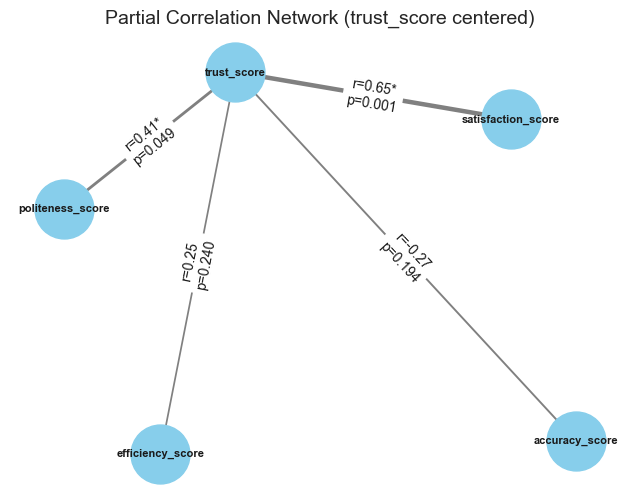

In [45]:
import pandas as pd
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt

xls = pd.ExcelFile('C:\\Users\\grace\\VisualStudioProject\\Thesis\\data.xlsm')
Hum2 = pd.read_excel(xls, sheet_name='Hum2')

variables = ['trust_score', 'accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score']
pcorr_results = {}

for var in variables:
    if var == 'trust_score':
        continue
    covars = [v for v in variables if v not in ['trust_score', var]]
    result = pg.partial_corr(data=Hum2, x='trust_score', y=var, covar=covars, method='pearson')
    pcorr_results[var] = {'r': result['r'].values[0], 'p-val': result['p-val'].values[0]}

G = nx.Graph()
G.add_node('trust_score')
for var in pcorr_results:
    G.add_node(var)
    r = pcorr_results[var]['r']
    G.add_edge('trust_score', var, weight=r)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42, k=1.5)

nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1800)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

edges = G.edges(data=True)
edge_labels = {}
for u, v, d in edges:
    r = d['weight']
    p = pcorr_results[v]['p-val'] if u == 'trust_score' else pcorr_results[u]['p-val']
    significance = '*' if p < 0.05 else ''
    edge_labels[(u, v)] = f"r={r:.2f}{significance}\np={p:.3f}"

nx.draw_networkx_edges(G, pos, width=[abs(d['weight'])*5 for _, _, d in edges], edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5)

plt.title("Partial Correlation Network (trust_score centered)", fontsize=14)
plt.axis('off')
plt.show()

Partial correlation (satisfaction_score vs accuracy_score):
           n         r          CI95%     p-val
pearson  27  0.209764  [-0.21, 0.57]  0.325228
Partial correlation (satisfaction_score vs efficiency_score):
           n         r          CI95%     p-val
pearson  27 -0.209799  [-0.57, 0.21]  0.325144
Partial correlation (satisfaction_score vs trust_score):
           n         r         CI95%    p-val
pearson  27  0.647222  [0.33, 0.83]  0.00063
Partial correlation (satisfaction_score vs politeness_score):
           n       r          CI95%     p-val
pearson  27 -0.3659  [-0.67, 0.04]  0.078678


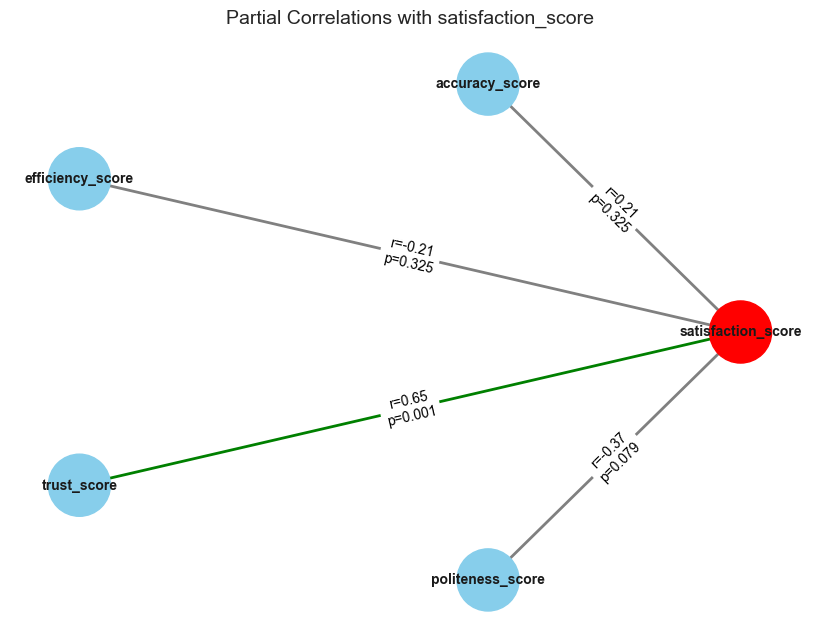

In [ ]:
import pandas as pd
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt

xls = pd.ExcelFile('C:\\Users\\grace\\VisualStudioProject\\Thesis\\data.xlsm')
Hum2 = pd.read_excel(xls, sheet_name='Hum2')

variables = ['accuracy_score', 'efficiency_score', 'trust_score', 'politeness_score']

pcorr_results = []
for var in variables:
    covars = [v for v in variables if v != var]
    pcorr = pg.partial_corr(data=Hum2, x='satisfaction_score', y=var, covar=covars, method='pearson')
    pcorr_results.append(pcorr)
    print(f"Partial correlation (satisfaction_score vs {var}):\n", pcorr)

G = nx.Graph()
G.add_node('satisfaction_score', color='red')

for i, var in enumerate(variables):
    r = pcorr_results[i]['r'].values[0]
    p = pcorr_results[i]['p-val'].values[0]
    label = f"r={r:.2f}\np={p:.3f}"
    if p < 0.05:
        edge_color = 'green' 
    else:
        edge_color = 'gray'  
    G.add_node(var, color='skyblue')
    G.add_edge('satisfaction_score', var, weight=abs(r), label=label, color=edge_color)

pos = nx.circular_layout(G)
edge_colors = [G[u][v]['color'] for u,v in G.edges()]
edge_labels = nx.get_edge_attributes(G,'label')
node_colors = [G.nodes[n]['color'] for n in G.nodes()]

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, font_weight='bold', edge_color=edge_colors, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
plt.title("Partial Correlations with satisfaction_score", fontsize=14)
plt.show()

Step7: Research on how trust_score is affected by politeness_score, and accuracy_score in all models
                       satisfaction_score is affected by accuracy_score, politeness_score, efficiency_score in all models

In [ ]:
import pandas as pd

xls = pd.ExcelFile(r'C:\Users\grace\VisualStudioProject\Thesis\data.xlsm')

sheet_names = ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']

dfs = {name: pd.read_excel(xls, sheet_name=name) for name in sheet_names}

hum1 = dfs['Hum1'].copy()
mask = hum1['question_id'].between(17,27)
cols_to_fill = ['accuracy_score', 'efficiency_score', 'politeness_score', 
                'trust_score', 'satisfaction_score', 'risk_flag', 'token_count']

for col in cols_to_fill:
    mean_value = hum1[col].mean(skipna=True)
    hum1.loc[mask, col] = hum1.loc[mask, col].fillna(mean_value)

dfs['Hum1'] = hum1

combined_df = pd.concat([dfs[name] for name in sheet_names], ignore_index=True)

desc_stats = combined_df.describe(include='all')
print(desc_stats)

        question_id                                      question_text  \
count    216.000000                                                216   
unique          NaN                                                 27   
top             NaN  Can I apply for a credit card as a master stud...   
freq            NaN                                                  8   
mean      14.000000                                                NaN   
std        7.806974                                                NaN   
min        1.000000                                                NaN   
25%        7.000000                                                NaN   
50%       14.000000                                                NaN   
75%       21.000000                                                NaN   
max       27.000000                                                NaN   

        accuracy_score  efficiency_score  politeness_score  trust_score  \
count       216.000000        216.00

In [50]:
import pingouin as pg
import pandas as pd

xls = pd.ExcelFile(r'C:\Users\grace\VisualStudioProject\Thesis\data.xlsm')
sheet_names = ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs = {name: pd.read_excel(xls, sheet_name=name) for name in sheet_names}

hum1 = dfs['Hum1'].copy()
mask = hum1['question_id'].between(17,27)
cols_to_fill = ['accuracy_score', 'efficiency_score', 'politeness_score', 
                'trust_score', 'satisfaction_score', 'risk_flag', 'token_count']
for col in cols_to_fill:
    mean_value = hum1[col].mean(skipna=True)
    hum1.loc[mask, col] = hum1.loc[mask, col].fillna(mean_value)
dfs['Hum1'] = hum1

combined_df = pd.concat([dfs[name] for name in sheet_names], ignore_index=True)

covariates = ['accuracy_score', 'efficiency_score', 'politeness_score', 
              'satisfaction_score', 'token_count', 'risk_flag']

for var in covariates:
    other_covars = [v for v in covariates if v != var]
    pcorr = pg.partial_corr(data=combined_df,
                            x='trust_score',
                            y=var,
                            covar=other_covars,
                            method='pearson')
    print(f"Partial correlation (trust_score vs {var}):\n", pcorr, "\n")


Partial correlation (trust_score vs accuracy_score):
            n         r         CI95%     p-val
pearson  216  0.147985  [0.01, 0.28]  0.031659 

Partial correlation (trust_score vs efficiency_score):
            n         r          CI95%     p-val
pearson  216  0.023961  [-0.11, 0.16]  0.729316 

Partial correlation (trust_score vs politeness_score):
            n         r         CI95%     p-val
pearson  216  0.307952  [0.18, 0.43]  0.000005 

Partial correlation (trust_score vs satisfaction_score):
            n         r         CI95%         p-val
pearson  216  0.577952  [0.48, 0.66]  3.361689e-20 

Partial correlation (trust_score vs token_count):
            n         r          CI95%     p-val
pearson  216  0.060579  [-0.08, 0.19]  0.381282 

Partial correlation (trust_score vs risk_flag):
            n         r           CI95%     p-val
pearson  216 -0.243647  [-0.37, -0.11]  0.000354 



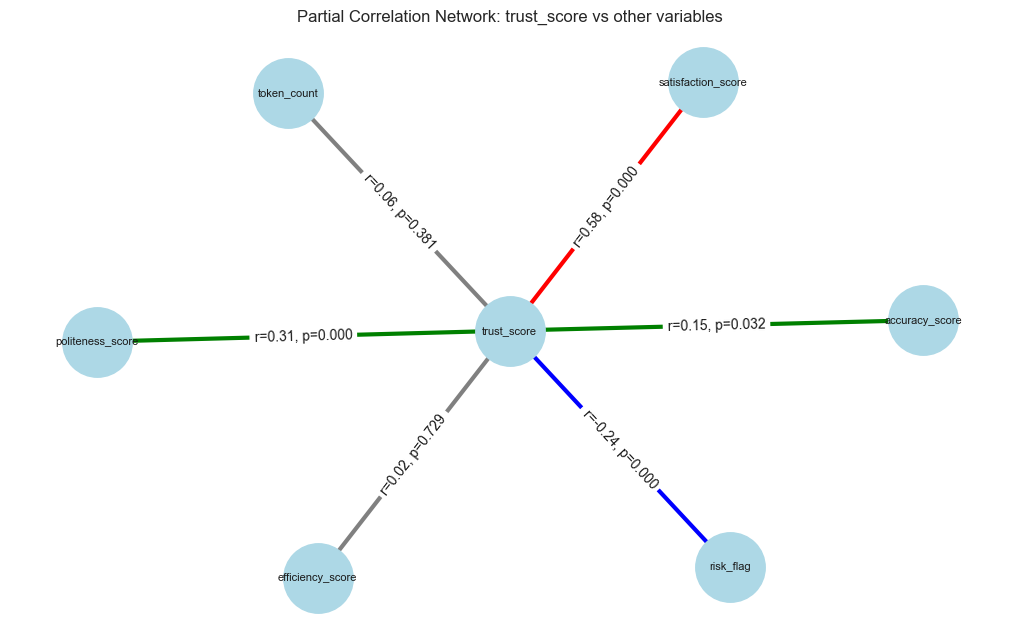

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import pingouin as pg

variables = ['accuracy_score', 'efficiency_score', 'politeness_score', 
             'satisfaction_score', 'token_count', 'risk_flag']

pcorr_results = {}
for var in variables:
    covars = [v for v in variables if v != var]
    pcorr = pg.partial_corr(data=combined_df,
                            x='trust_score',
                            y=var,
                            covar=covars,
                            method='pearson')
    pcorr_results[var] = pcorr.iloc[0] 

# Create network graph
G = nx.Graph()
G.add_node('trust_score')

for var, res in pcorr_results.items():
    r = res['r']
    p = res['p-val']
    # Edge color based on significance and effect size
    if p < 0.05:
        if r >= 0.5:
            color = 'red'          # strong positive
        elif r <= -0.2:
            color = 'blue'         # strong negative
        else:
            color = 'green'      # moderate significant
    else:
        color = 'gray'             # non-significant
    label = f"r={r:.2f}, p={p:.3f}"
    G.add_node(var)
    G.add_edge('trust_score', var, color=color, label=label)

pos = nx.spring_layout(G, seed=42)
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue',
        edge_color=colors, width=3, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
plt.title('Partial Correlation Network: trust_score vs other variables')
plt.show()


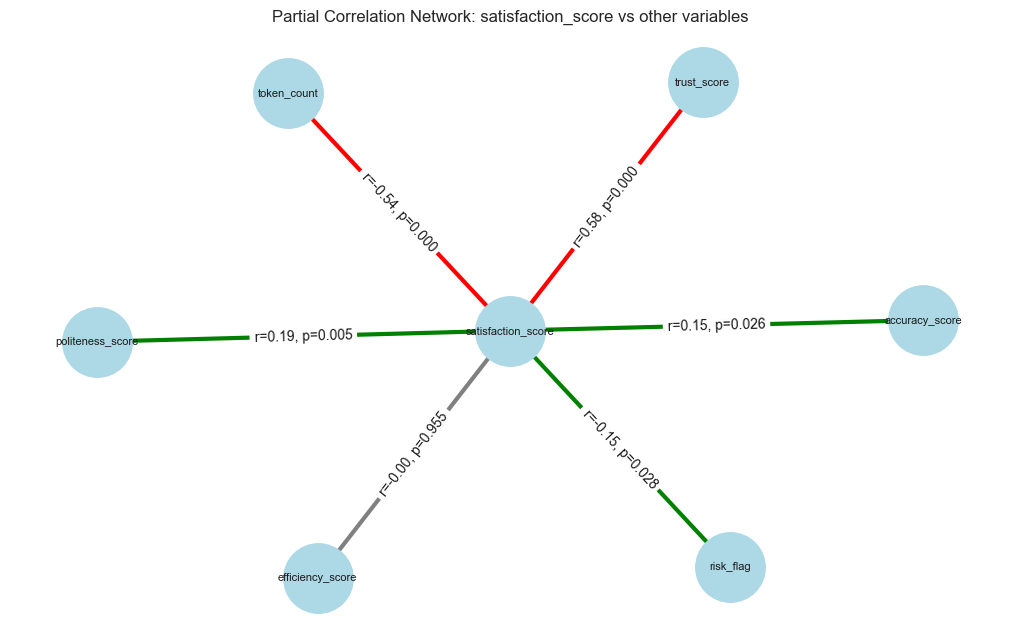

In [ ]:
import pandas as pd
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt

xls = pd.ExcelFile(r'C:\Users\grace\VisualStudioProject\Thesis\data.xlsm')
sheet_names = ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs = {name: pd.read_excel(xls, sheet_name=name) for name in sheet_names}

hum1 = dfs['Hum1'].copy()
mask = hum1['question_id'].between(17,27)
cols_to_fill = ['accuracy_score', 'efficiency_score', 'politeness_score', 
                'trust_score', 'satisfaction_score', 'risk_flag', 'token_count']
for col in cols_to_fill:
    mean_value = hum1[col].mean(skipna=True)
    hum1.loc[mask, col] = hum1.loc[mask, col].fillna(mean_value)
dfs['Hum1'] = hum1

combined_df = pd.concat([dfs[name] for name in sheet_names], ignore_index=True)

variables = ['accuracy_score', 'efficiency_score', 'politeness_score', 
             'trust_score', 'token_count', 'risk_flag']

pcorr_results = {}
for var in variables:
    covars = [v for v in variables if v != var]
    pcorr = pg.partial_corr(data=combined_df,
                            x='satisfaction_score',
                            y=var,
                            covar=covars,
                            method='pearson')
    pcorr_results[var] = pcorr.iloc[0]

G = nx.Graph()
G.add_node('satisfaction_score')

for var, res in pcorr_results.items():
    r = res['r']
    p = res['p-val']
    # Edge color based on significance and effect size
    if p < 0.05:
        if abs(r) >= 0.5:
            color = 'red'          # strong positive/negative
        else:
            color = 'green'        # moderate significant
    else:
        color = 'gray'             # non-significant
    label = f"r={r:.2f}, p={p:.3f}"
    G.add_node(var)
    G.add_edge('satisfaction_score', var, color=color, label=label)

pos = nx.spring_layout(G, seed=42)
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue',
        edge_color=colors, width=3, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
plt.title('Partial Correlation Network: satisfaction_score vs other variables')
plt.show()


Step8: text analysis